In [2]:
import pandas as pd
# data = pd.read_excel("./转置后数据.xlsx")
data = pd.read_excel('./转置后数据.xlsx', sheet_name='Sheet1')
data

,公司id,季度,营业收入增长率,营业利润增长率,利润总额增长率,净利润增长率
0,600004,2021.12增长率,0.427390,-0.041932,-0.050520,-0.200747
1,600004,2021.09增长率,0.514608,0.186896,0.181876,0.208521
2,600004,2021.06增长率,1.021941,1.579632,1.568244,1.614679
3,600004,2021.03增长率,-0.773206,0.056064,0.239218,-0.341958
4,600004,2020.12增长率,0.389258,-0.227915,-0.298677,-0.187741
...,...,...,...,...,...,...
7600,603997,2019.06增长率,0.968628,1.742558,1.730184,2.088772
7601,603997,2019.03增长率,-0.365284,-0.321877,-0.319717,-0.433308
7602,603997,2018.12增长率,3.658989,-0.386546,-0.382857,-0.466939
7603,603997,2018.09增长率,0.474528,0.583466,0.584976,0.591943


# 由于异常值已经提前剔除过，此处略过异常值处理

# 开始进行第一次聚类

# 数据标准化处理，本例中采用采用 Z-score 标准化方法

In [3]:
from sklearn import preprocessing
filtered_columns = ["营业收入增长率","营业利润增长率","利润总额增长率","净利润增长率"]

teenager_sns_zscore = pd.DataFrame(preprocessing.scale(data[filtered_columns]),\
                                   columns = data[filtered_columns].columns)
teenager_sns_zscore

,营业收入增长率,营业利润增长率,利润总额增长率,净利润增长率
0,-0.025995,-0.020173,0.005456,-0.042546
1,-0.009331,-0.009832,0.008037,-0.028654
2,0.087602,0.053107,0.023437,0.019075
3,-0.255383,-0.015745,0.008674,-0.047339
4,-0.033280,-0.028578,0.002699,-0.042105
...,...,...,...,...
7600,0.077416,0.060470,0.025235,0.035167
7601,-0.177445,-0.032824,0.002466,-0.050440
7602,0.591442,-0.035747,0.001764,-0.051581
7603,-0.016988,0.008089,0.012515,-0.015640


# 模型训练 第一次聚类选取K为5

In [4]:
from sklearn.cluster import KMeans
teenager_cluster_model = KMeans(n_clusters = 5,random_state = 4)
teenager_cluster_model.fit(teenager_sns_zscore)

KMeans(n_clusters=5, random_state=4)

# 聚类结果分析

In [5]:
teenager_clusters = pd.Series(teenager_cluster_model.labels_)
teenager_clusters.value_counts().sort_index()

0    7597
1       1
2       2
3       4
4       1
dtype: int64

# 聚类中心结果保存在 teenager_cluster_model 的 centers 属性。

In [6]:
centers = pd.DataFrame(teenager_cluster_model.cluster_centers_, \
                       columns = teenager_sns_zscore.columns)
centers

,营业收入增长率,营业利润增长率,利润总额增长率,净利润增长率
0,-0.015795,-0.015261,0.010659,-0.010758
1,-0.030085,1.635044,-85.792982,0.670693
2,59.897054,-0.127395,-0.021314,-0.119103
3,0.030033,27.991557,1.083731,0.956734
4,0.113742,2.588870,0.522660,77.465510


In [7]:
res1 = data[(teenager_cluster_model.labels_ == 1)]
res1

,公司id,季度,营业收入增长率,营业利润增长率,利润总额增长率,净利润增长率
4699,601068,2020.12增长率,0.405983,36.584966,-7724.233178,20.812199


In [8]:
res2 = data[(teenager_cluster_model.labels_ == 2)]
res2

,公司id,季度,营业收入增长率,营业利润增长率,利润总额增长率,净利润增长率
1442,600319,2021.06增长率,299.594501,0.745148,0.725171,0.733733
2886,600647,2020.06增长率,328.521830,-5.574257,-5.646184,-5.646184


In [9]:
res3 = data[(teenager_cluster_model.labels_ == 3)]
res3

,公司id,季度,营业收入增长率,营业利润增长率,利润总额增长率,净利润增长率
1838,600391,2019.12增长率,1.052153,651.775855,-11.134389,-5.268797
1879,600409,2020.12增长率,0.413355,358.045226,-96.957954,23.413100
2112,600470,2018.12增长率,0.452232,1041.257218,491.850679,92.195109
4195,600876,2019.06增长率,0.964792,428.144629,4.335331,6.617876


In [10]:
res4 = data[(teenager_cluster_model.labels_ == 4)]
res4

,公司id,季度,营业收入增长率,营业利润增长率,利润总额增长率,净利润增长率
3231,600697,2020.06增长率,1.158757,57.691368,46.511886,2283.286025


In [11]:
data

,公司id,季度,营业收入增长率,营业利润增长率,利润总额增长率,净利润增长率
0,600004,2021.12增长率,0.427390,-0.041932,-0.050520,-0.200747
1,600004,2021.09增长率,0.514608,0.186896,0.181876,0.208521
2,600004,2021.06增长率,1.021941,1.579632,1.568244,1.614679
3,600004,2021.03增长率,-0.773206,0.056064,0.239218,-0.341958
4,600004,2020.12增长率,0.389258,-0.227915,-0.298677,-0.187741
...,...,...,...,...,...,...
7600,603997,2019.06增长率,0.968628,1.742558,1.730184,2.088772
7601,603997,2019.03增长率,-0.365284,-0.321877,-0.319717,-0.433308
7602,603997,2018.12增长率,3.658989,-0.386546,-0.382857,-0.466939
7603,603997,2018.09增长率,0.474528,0.583466,0.584976,0.591943


In [77]:
from pyecharts.charts import Bar
from pyecharts import options as opts

# 示例数据
cate = ["第一簇", "第二簇", "第三簇", "第四簇", "第五簇"]
# 营业收入增长率	营业利润增长率	利润总额增长率	净利润增长率
# data1 = [5, 20, 36, 10, 75, 90]
# data2 = [8, 30, 26, 12, 65, 80]
# data1=[-0.015795,-0.015261,0.010659,-0.010758]
# data1=[-0.015795,-0.015261,0.010659,-0.010758]
# data2=[-0.030085,1.635044,-85.792982,0.670693]
# data3=[59.897054,-0.127395,-0.021314,-0.119103]
# data4=[0.030033,27.991557,1.083731,0.956734]
# data5=[0.113742,2.588870,0.522660,77.465510]

data1=[-0.016,-0.03,59.9,0.03,0.11]
data2=[-0.015,1.64,-0.127,27.99,2.58]
data3=[0.01,-85.79,-0.0213,1.083,0.522]
data4=[-0.01,0.67,-0.119,0.956,77.46]


bar = (
    Bar()
    .add_xaxis(cate)
    .add_yaxis("营业收入增长率", data1) # y轴设置
    .add_yaxis("营业利润增长率", data2) # y轴设置
    .add_yaxis("利润总额增长率", data3) # y轴设置
    .add_yaxis("净利润增长率", data4) # y轴设置
    .set_global_opts(title_opts=opts.TitleOpts(title="第一次聚类结果", subtitle="各簇的特点"))
    .set_series_opts(label_opts=opts.LabelOpts(is_show=True),
                    markpoint_opts=opts.MarkPointOpts(
#                         data=[
#                 opts.MarkPointItem(type_="min", name="最小值"),
#                 opts.MarkPointItem(type_="max", name="最大值"),
#                 opts.MarkPointItem(type_="average", name="平均值")]
                    )
    ))

bar.render('柱状图1.html')


# # 1.x版本支持链式调用
# bar = (Bar()
#        .add_xaxis(cate)
#        .add_yaxis('第一簇', data1)
#        .add_yaxis('第二簇', data2)
#        .add_yaxis('第三簇', data3)
#        .add_yaxis('第四簇', data4)
#        .add_yaxis('第五簇', data5)
#        .set_global_opts(title_opts=opts.TitleOpts(title="Bar-基本示例", subtitle="我是副标题"))
#       )

# # bar.render_notebook()
# bar.render('柱状图1.html')

'F:\\python_all_set\\上市公司财务_爬虫_聚类\\柱状图1.html'

# 将疑点删除后，进行第二次聚类

In [12]:
data2 = pd.read_excel('./转置后数据.xlsx', sheet_name='Sheet2')
data2

,公司id,季度,营业收入增长率,营业利润增长率,利润总额增长率,净利润增长率
0,600004,2021.12增长率,0.427390,-0.041932,-0.050520,-0.200747
1,600004,2021.09增长率,0.514608,0.186896,0.181876,0.208521
2,600004,2021.06增长率,1.021941,1.579632,1.568244,1.614679
3,600004,2021.03增长率,-0.773206,0.056064,0.239218,-0.341958
4,600004,2020.12增长率,0.389258,-0.227915,-0.298677,-0.187741
...,...,...,...,...,...,...
7592,603997,2019.06增长率,0.968628,1.742558,1.730184,2.088772
7593,603997,2019.03增长率,-0.365284,-0.321877,-0.319717,-0.433308
7594,603997,2018.12增长率,3.658989,-0.386546,-0.382857,-0.466939
7595,603997,2018.09增长率,0.474528,0.583466,0.584976,0.591943


In [13]:
teenager_sns_zscore2 = pd.DataFrame(preprocessing.scale(data2[filtered_columns]),\
                                   columns = data2[filtered_columns].columns)
teenager_sns_zscore2

,营业收入增长率,营业利润增长率,利润总额增长率,净利润增长率
0,-0.043770,-0.006874,-0.031123,-0.069431
1,0.027744,0.007596,-0.015683,-0.039089
2,0.443735,0.095667,0.076426,0.065158
3,-1.028207,-0.000678,-0.011873,-0.079900
4,-0.075037,-0.018635,-0.047611,-0.068467
...,...,...,...,...
7592,0.400021,0.105970,0.087185,0.100306
7593,-0.693729,-0.024577,-0.049009,-0.086672
7594,2.606001,-0.028667,-0.053204,-0.089166
7595,-0.005119,0.032673,0.011098,-0.010664


# 这次选取4个中心点

In [14]:
teenager_cluster_model2 = KMeans(n_clusters = 4,random_state = 4)
teenager_cluster_model2.fit(teenager_sns_zscore2)

KMeans(n_clusters=4, random_state=4)

In [15]:
teenager_clusters2 = pd.Series(teenager_cluster_model2.labels_)
teenager_clusters2.value_counts().sort_index()

0    7590
1       2
2       2
3       3
dtype: int64

In [16]:
centers2 = pd.DataFrame(teenager_cluster_model2.cluster_centers_, \
                       columns = teenager_sns_zscore2.columns)
centers2

,营业收入增长率,营业利润增长率,利润总额增长率,净利润增长率
0,-0.014283,0.010720,0.009403,-0.014700
1,0.594561,-45.334147,-37.830209,2.880609
2,0.742225,4.156108,1.647665,52.376774
3,35.245181,0.330093,0.333045,0.351558


# 各疑点数据

In [17]:
res2_1 = data2[(teenager_cluster_model2.labels_ == 1)]
res2_1

,公司id,季度,营业收入增长率,营业利润增长率,利润总额增长率,净利润增长率
6092,603157,2019.06增长率,0.665683,-489.171312,-826.632184,50.712454
6609,603383,2021.06增长率,1.746085,-944.495935,-311.321716,28.470154


In [18]:
res2_2 = data2[(teenager_cluster_model2.labels_ == 2)]
res2_2

,公司id,季度,营业收入增长率,营业利润增长率,利润总额增长率,净利润增长率
2282,600523,2020.06增长率,1.260962,119.578662,37.546651,696.836359
6062,603126,2019.06增长率,1.510981,12.001752,12.888306,717.618697


In [19]:
res2_3 = data2[(teenager_cluster_model2.labels_ == 3)]
res2_3

,公司id,季度,营业收入增长率,营业利润增长率,利润总额增长率,净利润增长率
1733,600370,2019.09增长率,35.867828,14.392189,14.718765,14.737667
2909,600649,2020.12增长率,35.051620,1.772809,1.739555,1.787342
3705,600800,2020.06增长率,59.475448,-0.304692,-0.166227,-0.091520


# 第三次聚类

In [20]:
data3 = pd.read_excel('./转置后数据.xlsx', sheet_name='Sheet3')
data3

,公司id,季度,营业收入增长率,营业利润增长率,利润总额增长率,净利润增长率
0,600004,2021.12增长率,0.427390,-0.041932,-0.050520,-0.200747
1,600004,2021.09增长率,0.514608,0.186896,0.181876,0.208521
2,600004,2021.06增长率,1.021941,1.579632,1.568244,1.614679
3,600004,2021.03增长率,-0.773206,0.056064,0.239218,-0.341958
4,600004,2020.12增长率,0.389258,-0.227915,-0.298677,-0.187741
...,...,...,...,...,...,...
7585,603997,2019.06增长率,0.968628,1.742558,1.730184,2.088772
7586,603997,2019.03增长率,-0.365284,-0.321877,-0.319717,-0.433308
7587,603997,2018.12增长率,3.658989,-0.386546,-0.382857,-0.466939
7588,603997,2018.09增长率,0.474528,0.583466,0.584976,0.591943


In [21]:
teenager_sns_zscore3 = pd.DataFrame(preprocessing.scale(data3[filtered_columns]),\
                                   columns = data3[filtered_columns].columns)
teenager_sns_zscore3

,营业收入增长率,营业利润增长率,利润总额增长率,净利润增长率
0,-0.042769,-0.027927,-0.054870,-0.104338
1,0.060958,-0.004959,-0.033965,-0.046496
2,0.664326,0.134831,0.090747,0.152238
3,-1.470631,-0.018091,-0.028807,-0.124296
4,-0.088120,-0.046594,-0.077194,-0.102500
...,...,...,...,...
7585,0.600921,0.151184,0.105314,0.219242
7586,-0.985493,-0.056025,-0.079086,-0.137206
7587,3.800551,-0.062516,-0.084766,-0.141960
7588,0.013291,0.034845,0.002296,0.007693


In [22]:
teenager_cluster_model3 = KMeans(n_clusters = 3,random_state = 4)
teenager_cluster_model3.fit(teenager_sns_zscore3)

KMeans(n_clusters=3, random_state=4)

## 分析结果

In [23]:
teenager_clusters3 = pd.Series(teenager_cluster_model3.labels_)
teenager_clusters3.value_counts().sort_index()

0    7566
1      22
2       2
dtype: int64

In [24]:
res3_1 = data3[(teenager_cluster_model3.labels_ == 1)]
res3_1


,公司id,季度,营业收入增长率,营业利润增长率,利润总额增长率,净利润增长率
404,600067,2018.06增长率,1.599829,-26.004263,351.215044,-7.558275
1103,600255,2019.12增长率,0.276557,47.878009,55.570890,33.853701
1144,600268,2020.12增长率,0.830484,8.899642,8.767687,67.548387
1755,600375,2021.06增长率,1.498373,57.255934,63.139742,51.440147
1856,600396,2018.06增长率,0.763711,101.203065,167.461538,79.291683
2031,600435,2019.06增长率,2.556119,39.309989,40.874067,147.560461
2053,600449,2021.06增长率,2.973579,78.746022,64.739520,69.984106
2104,600470,2019.12增长率,0.358926,80.849638,105.380417,114.900901
2779,600620,2019.06增长率,0.982234,29.843707,16.715501,88.293921
3066,600675,2018.06增长率,4.007838,62.006964,57.718047,77.109091


In [25]:
res3_2 = data3[(teenager_cluster_model3.labels_ == 2)]
res3_2


,公司id,季度,营业收入增长率,营业利润增长率,利润总额增长率,净利润增长率
960,600212,2021.12增长率,0.370203,-477.338432,131.279315,131.279315
5812,603009,2020.12增长率,0.480363,-495.830557,3.632642,3.348242


# 第四次聚类

In [26]:
data4 = pd.read_excel('./转置后数据.xlsx', sheet_name='Sheet4')
data4

,公司id,季度,营业收入增长率,营业利润增长率,利润总额增长率,净利润增长率
0,600004,2021.12增长率,0.427390,-0.041932,-0.050520,-0.200747
1,600004,2021.09增长率,0.514608,0.186896,0.181876,0.208521
2,600004,2021.06增长率,1.021941,1.579632,1.568244,1.614679
3,600004,2021.03增长率,-0.773206,0.056064,0.239218,-0.341958
4,600004,2020.12增长率,0.389258,-0.227915,-0.298677,-0.187741
...,...,...,...,...,...,...
7561,603997,2019.06增长率,0.968628,1.742558,1.730184,2.088772
7562,603997,2019.03增长率,-0.365284,-0.321877,-0.319717,-0.433308
7563,603997,2018.12增长率,3.658989,-0.386546,-0.382857,-0.466939
7564,603997,2018.09增长率,0.474528,0.583466,0.584976,0.591943


In [27]:
teenager_sns_zscore4 = pd.DataFrame(preprocessing.scale(data4[filtered_columns]),\
                                   columns = data4[filtered_columns].columns)
teenager_sns_zscore4

,营业收入增长率,营业利润增长率,利润总额增长率,净利润增长率
0,-0.039336,-0.057970,-0.047191,-0.117814
1,0.064876,-0.010372,-0.010123,-0.021486
2,0.671065,0.279327,0.211013,0.309474
3,-1.473872,-0.037586,-0.000976,-0.151050
4,-0.084898,-0.096656,-0.086774,-0.114753
...,...,...,...,...
7561,0.607364,0.313217,0.236844,0.421059
7562,-0.986465,-0.116200,-0.090130,-0.172550
7563,3.821950,-0.129652,-0.100201,-0.180466
7564,0.016987,0.072118,0.054175,0.068758


In [28]:
teenager_cluster_model4 = KMeans(n_clusters = 2,random_state = 4)
teenager_cluster_model4.fit(teenager_sns_zscore4)

KMeans(n_clusters=2, random_state=4)

In [29]:
teenager_clusters4 = pd.Series(teenager_cluster_model4.labels_)
teenager_clusters4.value_counts().sort_index()

0    7560
1       6
dtype: int64

In [30]:
res4_1 = data4[(teenager_cluster_model4.labels_ == 1)]
res4_1

,公司id,季度,营业收入增长率,营业利润增长率,利润总额增长率,净利润增长率
1068,600249,2020.09增长率,0.672597,-62.617770,-285.411653,30.842239
1075,600249,2018.12增长率,0.391683,-143.928870,-5.162077,-2.095185
1655,600358,2019.06增长率,1.620442,-115.662529,14.841655,2.350563
2599,600588,2020.12增长率,0.846287,-113.589457,-357.394795,-39.685862
4242,600893,2019.06增长率,1.641916,-158.131843,18.107227,34.443830
6583,603383,2020.06增长率,2.016784,-161.916931,-90.879580,34.230608


  # 第五次聚类

In [31]:
data5 = pd.read_excel('./转置后数据.xlsx', sheet_name='Sheet5')
data5

,公司id,季度,营业收入增长率,营业利润增长率,利润总额增长率,净利润增长率
0,600004,2021.12增长率,0.427390,-0.041932,-0.050520,-0.200747
1,600004,2021.09增长率,0.514608,0.186896,0.181876,0.208521
2,600004,2021.06增长率,1.021941,1.579632,1.568244,1.614679
3,600004,2021.03增长率,-0.773206,0.056064,0.239218,-0.341958
4,600004,2020.12增长率,0.389258,-0.227915,-0.298677,-0.187741
...,...,...,...,...,...,...
7555,603997,2019.06增长率,0.968628,1.742558,1.730184,2.088772
7556,603997,2019.03增长率,-0.365284,-0.321877,-0.319717,-0.433308
7557,603997,2018.12增长率,3.658989,-0.386546,-0.382857,-0.466939
7558,603997,2018.09增长率,0.474528,0.583466,0.584976,0.591943


In [32]:
teenager_sns_zscore5 = pd.DataFrame(preprocessing.scale(data5[filtered_columns]),\
                                   columns = data5[filtered_columns].columns)
teenager_sns_zscore5

,营业收入增长率,营业利润增长率,利润总额增长率,净利润增长率
0,-0.038640,-0.122515,-0.120515,-0.118072
1,0.065583,-0.048517,-0.048596,-0.020023
2,0.671838,0.401864,0.380442,0.316853
3,-1.473334,-0.090825,-0.030850,-0.151903
4,-0.084208,-0.182658,-0.197312,-0.114957
...,...,...,...,...
7555,0.608131,0.454551,0.430558,0.430432
7556,-0.985874,-0.213043,-0.203823,-0.173788
7557,3.823070,-0.233955,-0.223363,-0.181845
7558,0.017689,0.079725,0.076151,0.071834


In [33]:
teenager_cluster_model5 = KMeans(n_clusters = 2,random_state = 4)
teenager_cluster_model5.fit(teenager_sns_zscore5)

KMeans(n_clusters=2, random_state=4)

In [34]:
teenager_clusters5 = pd.Series(teenager_cluster_model5.labels_)
teenager_clusters5.value_counts().sort_index()

0    5881
1    1679
dtype: int64

# 画图

In [35]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
#matplotlib画图中中文显示会有问题，需要这两行设置默认字体
from pyecharts.charts import * # 图表
from pyecharts.components import Table # 表格
from pyecharts import options as opts # 配置
from pyecharts.commons.utils import JsCode

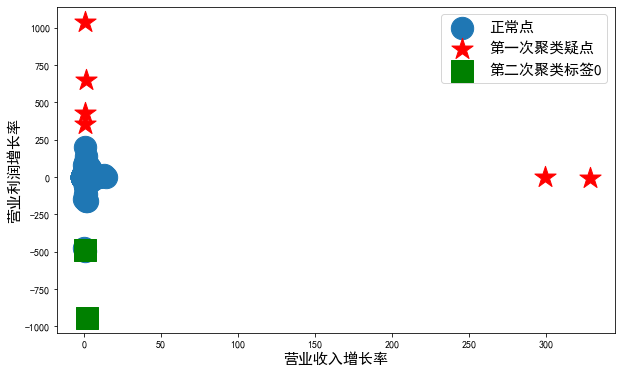

In [57]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#生成散点数据
# n = 1024
x_data=data3['营业收入增长率']
y_data=data3['营业利润增长率']
x_res1=res1['营业收入增长率']
y_res1=res1['营业利润增长率']
# x_res1=[20,2]
# y_res1=[0.745148,-5.574257]
# 1442	600319	2021.06增长率	299.594501	0.745148	0.725171	0.733733
# 2886	600647	2020.06增长率	328.521830	-5.574257	-5.646184	-5.646184

x_res2=res2['营业收入增长率']
y_res2=res2['营业利润增长率']
# x_res2=[0.452232]
# y_res2=[301]
# 2112	600470	2018.12增长率	0.452232	1041.257218	491.850679	92.195109
x_res3=res3['营业收入增长率']
y_res3=res3['营业利润增长率']
# 6617	603383	2021.06增长率	1.746085	-944.495935	-311.321716	28.470154
x_res4=res4['营业收入增长率']
y_res4=res4['营业利润增长率']
# 960	600212	2021.12增长率	0.370203	-477.338432	131.279315	131.279315
# 5824	603009	2020.12增长率	0.480363	-495.830557	3.632642	3.348242
# 6100	603157	2019.06增长率	0.665683	-489.171312	-826.632184	50.712454
# x_res5=res5['营业收入增长率']
# y_res5=res5['营业利润增长率']
# 1838	600391	2019.12增长率	1.052153	651.775855	-11.134389	-5.268797
# 1879	600409	2020.12增长率	0.413355	358.045226	-96.957954	23.413100
# 4195	600876	2019.06增长率	0.964792	428.144629	4.335331	6.617876

x_res2_1=res2_1['营业收入增长率']
y_res2_1=res2_1['营业利润增长率']
x_res2_2=res2_2['营业收入增长率']
y_res2_2=res2_2['营业利润增长率']
x_res2_3=res2_3['营业收入增长率']
y_res2_3=res2_3['营业利润增长率']

# x_res3_2=res3_2['营业收入增长率']
# y_res3_2=res3_2['营业利润增长率']

# res3_2

# X = np.random.normal(0,1,n)
# Y = np.random.normal(0,1,n)
plt.figure(figsize=(10,6)) 
plt.xlabel('营业收入增长率',fontsize=15)
#设置Y轴标签
plt.ylabel('营业利润增长率',fontsize=15)
plt.scatter(x_data,y_data,s=500,marker="o",label='正常点')    #输入散点数据
# plt.scatter(x_res1,y_res1,s=500,c="red",marker="*",label='第一次聚类疑点')
plt.scatter(x_res2,y_res2,s=500,c="red",marker="*",label='第一次聚类疑点')
plt.scatter(x_res3,y_res3,s=500,c="red",marker="*")
# plt.scatter(x_res4,y_res4,s=500,c="red",marker="*")
# plt.scatter(x_res5,y_res5,s=500,c="red",marker="*")
plt.scatter(x_res2_1,y_res2_1,s=500,c="g",marker="s",label='第二次聚类标签0')
# plt.scatter(x_res2_2,y_res2_2,s=500,c="g",marker="d")
# plt.scatter(x_res2_3,y_res2_3,s=500,c="g",marker="d")
# plt.scatter(x_res3_2,y_res3_2,s=50,c="k",marker="d",label='第二次聚类标签2')
plt.legend(fontsize=15)
plt.show()